In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sn
import nbimporter
from plot_exploration import plot_scatter_tooltip
import bokeh
from bokeh.plotting import output_notebook
output_notebook()


data = pd.read_csv("data/combined_stats.csv", index_col=0)
data = data.dropna()
# Missing column is awards_per (useless)
data = data.rename(columns={'USG%':'USG'})
relevant_players = data[(data['MP_g'] > 15) & (data['G'] > 20)]

Loading BokehJS ...

## Simple correlation Analysis on Advanced Stats

In [20]:
# Including some sleepers & lower role players
adv_cols = ['Player', 'Fpoints_avg_G', 'Fpoints_avg_min', 'Fpoints_per36', 'STL%', 'BLK%', 'USG', '3PAr', 'FTr', 'TRB%', 
               'OWS', 'DWS', 'WS/48', 'BPM', 'VORP']

adv_data = relevant_players[adv_cols]

adv_data.sort_values(by = 'Fpoints_avg_min', ascending = False).head(50).reset_index(drop=True, inplace=True)
adv_data['Fpoints_permin_rank'] = adv_data['Fpoints_avg_min'].rank(ascending=False)
adv_data['Fpoints_pergame_rank'] = adv_data['Fpoints_avg_G'].rank(ascending=False)
adv_data['permin_pergame_rank_diff'] = adv_data['Fpoints_permin_rank'] - adv_data['Fpoints_pergame_rank']
adv_data.sort_values(by='permin_pergame_rank_diff', ascending=False).head(30)

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_3941/3573778541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adv_data['Fpoints_permin_rank'] = adv_data['Fpoints_avg_min'].rank(ascending=False)
/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_3941/3573778541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adv_data['Fpoints_pergame_rank'] = adv_data['Fpoints_avg_G'].rank(ascending=False)
/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_3941/3573778541.py:10: SettingWi

,Player,Fpoints_avg_G,Fpoints_avg_min,Fpoints_per36,STL%,BLK%,USG,3PAr,FTr,TRB%,OWS,DWS,WS/48,BPM,VORP,Fpoints_permin_rank,Fpoints_pergame_rank,permin_pergame_rank_diff
20,DeMar DeRozan,41.3,1.092593,39.333333,1.5,1.5,25.8,0.166,0.452,6.4,7.0,2.2,0.147,1.8,2.8,40.0,25.0,15.0
21,Julius Randle,38.6,1.090395,39.254237,0.8,0.7,29.9,0.292,0.361,14.6,1.9,1.9,0.113,1.9,1.6,42.0,29.0,13.0
6,Kevin Durant,47.8,1.284946,46.258065,1.2,2.9,29.0,0.283,0.295,10.0,5.1,3.2,0.142,4.0,4.3,23.0,12.0,11.0
93,Brandon Miller,29.1,0.903727,32.534161,1.4,1.6,23.9,0.455,0.160,7.4,-0.3,1.0,0.015,-2.6,-0.3,50.0,40.0,10.0
29,Paolo Banchero,38.1,1.088571,39.188571,1.3,1.6,29.7,0.249,0.397,11.6,1.3,4.0,0.090,1.3,2.3,43.0,33.0,10.0
192,Jrue Holiday,32.2,0.981707,35.341463,1.3,2.1,16.3,0.467,0.104,8.9,3.3,3.0,0.133,2.1,2.4,46.0,37.0,9.0
245,Herbert Jones,27.5,0.901639,32.459016,2.2,2.6,14.1,0.464,0.269,6.5,3.3,3.0,0.131,0.6,1.6,51.0,42.5,8.5
13,Tyrese Maxey,44.8,1.194667,43.008000,1.3,1.1,28.0,0.401,0.266,5.4,5.9,2.1,0.147,3.1,3.4,29.0,21.0,8.0
106,Bogdan Bogdanović,30.6,1.006579,36.236842,1.9,1.0,22.3,0.583,0.149,6.2,2.8,1.2,0.079,0.2,1.4,45.0,38.0,7.0
19,Damian Lillard,42.1,1.192635,42.934844,1.3,0.6,28.4,0.487,0.403,6.8,5.8,1.9,0.143,2.1,2.7,30.0,24.0,6.0


/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_3941/2333302274.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(adv_data.corr(), annot=True, vmin = -1, vmax = 1)


<Figure size 3000x3000 with 0 Axes>

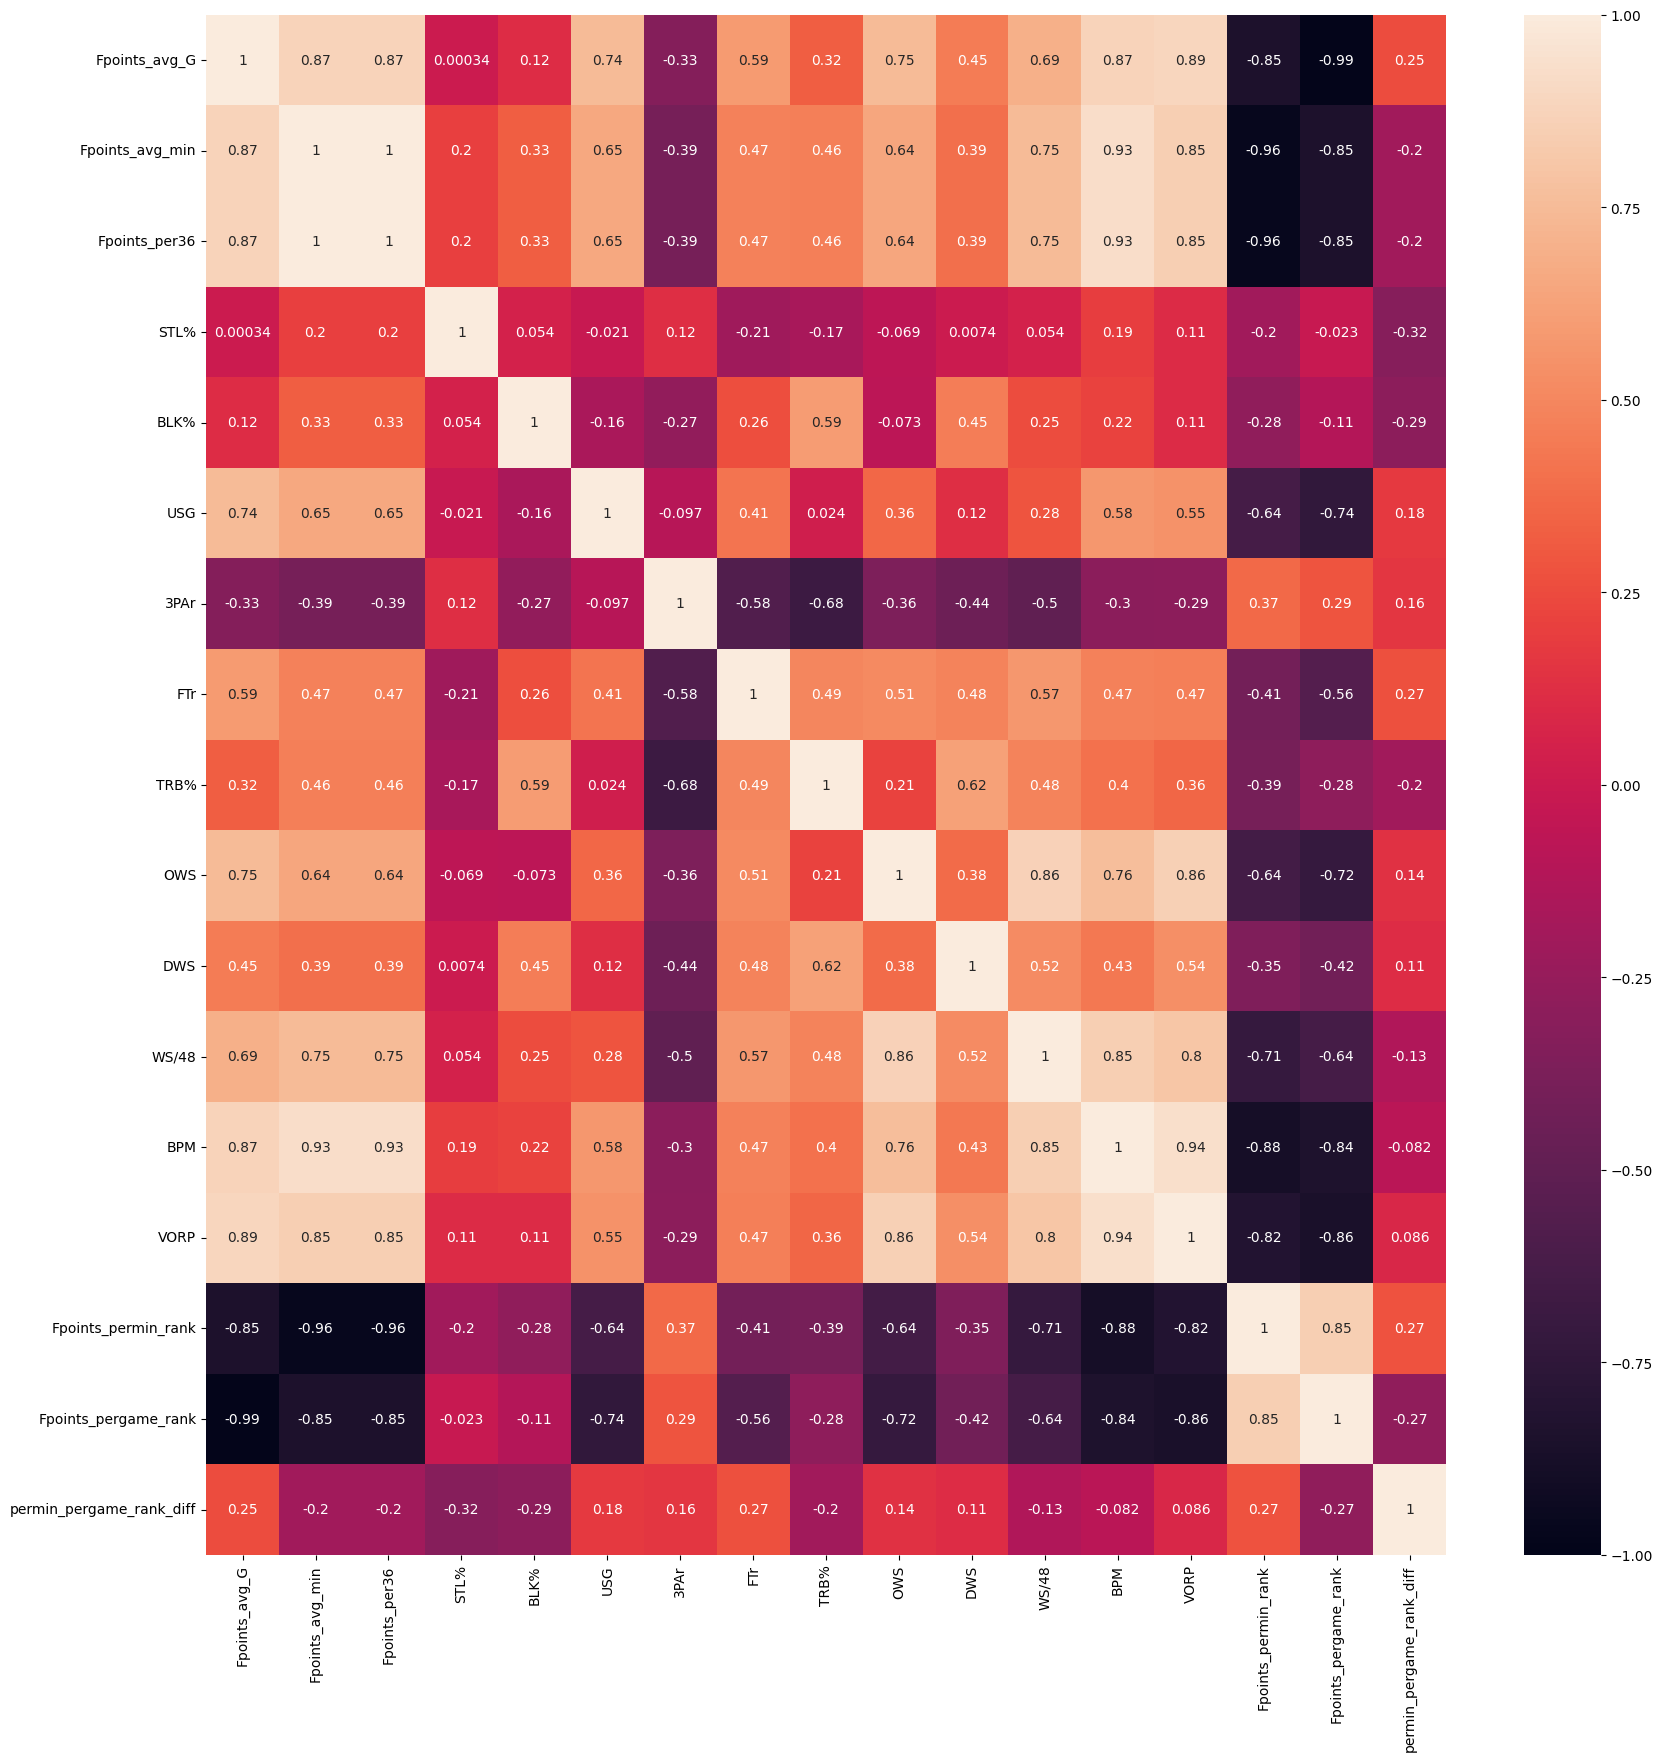

<Figure size 3000x3000 with 0 Axes>

In [21]:
plt.figure(figsize=(20,20))
sn.heatmap(adv_data.corr(), annot=True, vmin = -1, vmax = 1)
plt.figure(figsize=(30,30))

### Random Forest Model on Advanced Stats 
Model created not to predict - but to extract feature importances and find another measure of how what advanced stats relate strongly to fantasy points per minute. 

Mean Squared Error: 0.019706501938432885
   Feature  Importance
9      BPM    0.562637
10    VORP    0.201140
8    WS/48    0.110820
2      USG    0.048760
4      FTr    0.016753
3     3PAr    0.015831
1     BLK%    0.013745
5     TRB%    0.012771
6      OWS    0.008229
0     STL%    0.005144
7      DWS    0.004171


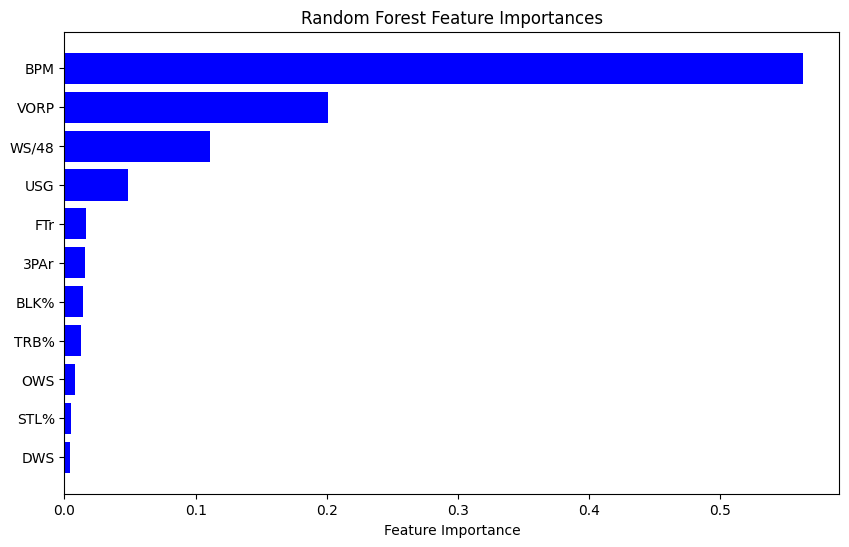

In [22]:
adv_cols = ['Fpoints_avg_min', 'STL%', 'BLK%', 'USG', '3PAr', 'FTr', 'TRB%', 
            'OWS', 'DWS', 'WS/48', 'BPM', 'VORP']

# Define X (features) and y (target variable)
X = data[adv_cols].drop(columns=['Fpoints_avg_min'])
y = data['Fpoints_avg_min']

# Train-test split (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Extract and plot feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [23]:
# Plotting fpoints per min rank vs BPM to try and find outliers
plot_scatter_tooltip(adv_data, "Fpoints_permin_rank", "BPM")